In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [4]:
# Load the Titanic dataset
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

In [5]:
print(df_train.head())
print("*"*100)
print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
**

In [6]:
def eda(data):
    # Check for missing values
    print("\nMissing Values:\n", data.isnull().sum())
    
    # Summary statistics
    print("\nData Description:\n", data.describe())
    
    # Visualizing distributions using histograms
    data.hist(figsize=(10, 6), bins=20)
    plt.suptitle("Feature Distributions")
    plt.show()
    
    # Box plots to check for outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data.select_dtypes(include=[np.number]))
    plt.title("Box Plot of Numeric Features")
    plt.show()
    
    # Survival rate comparison
    plt.figure(figsize=(8, 4))
    sns.countplot(x='Survived', data=data)
    plt.title("Survival Count")
    plt.show()


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Description:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204

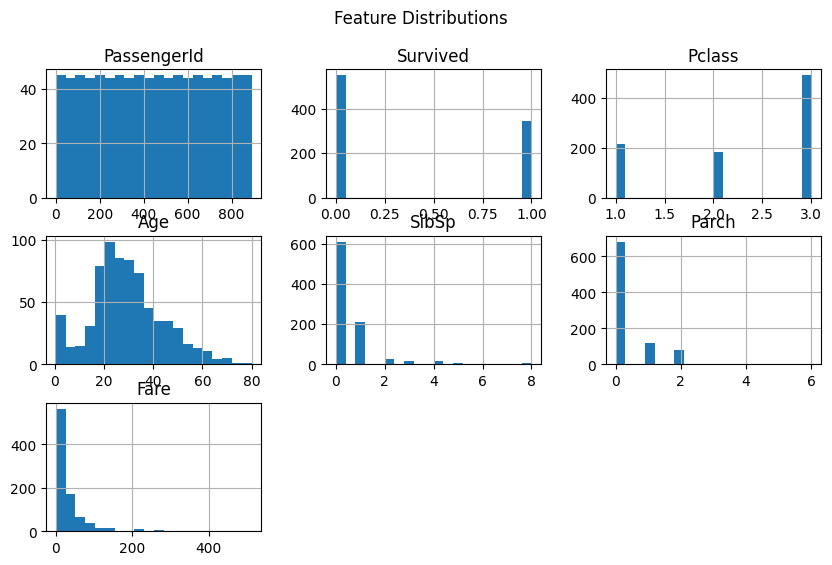

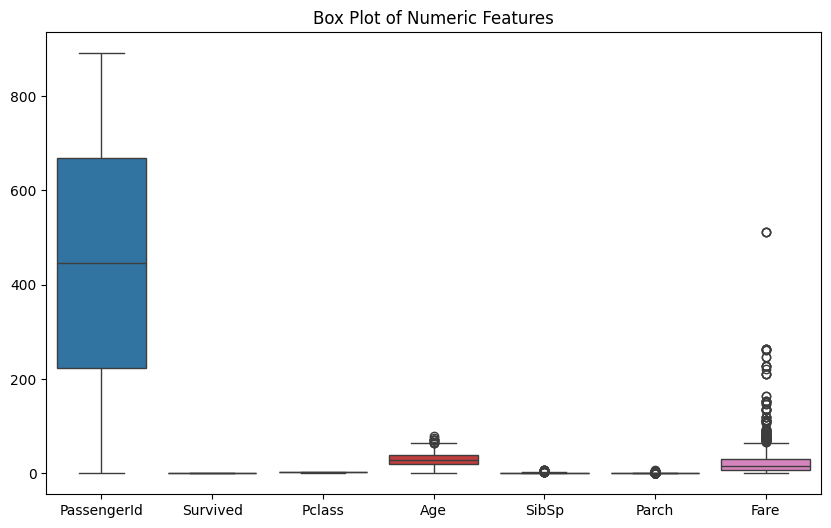

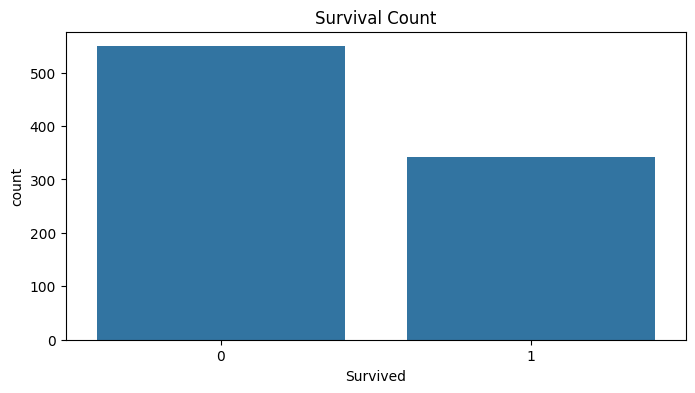

In [7]:
# Perform EDA on training data
eda(df_train)

In [8]:
# Data Preprocessing

# Fill missing values
imputer = SimpleImputer(strategy='median')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])

In [9]:
# Fill missing values in 'Embarked' with the most common value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

C:\Users\KRISHNA TEJA\AppData\Local\Temp\ipykernel_29588\3749172768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
C:\Users\KRISHNA TEJA\AppData\Local\Temp\ipykernel_29588\3749172768.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [10]:
# Drop 'Cabin' due to too many missing values
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

In [11]:
# Convert categorical features to numerical
encoder = LabelEncoder()
df_train['Sex'] = encoder.fit_transform(df_train['Sex'])
df_test['Sex'] = encoder.transform(df_test['Sex'])
df_train['Embarked'] = encoder.fit_transform(df_train['Embarked'])
df_test['Embarked'] = encoder.transform(df_test['Embarked'])

In [12]:
# Define features and target
X = df_train.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# LightGBM Model
lgb_model = lgb.LGBMClassifier(n_jobs=-1)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [14]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

d:\Selenium\webdriver\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:58:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    return accuracy, precision, recall, f1

In [16]:
lgb_results = evaluate_model(y_test, lgb_preds, "LightGBM")
xgb_results = evaluate_model(y_test, xgb_preds, "XGBoost")

LightGBM Performance:
Accuracy: 0.8212
Precision: 0.7838
Recall: 0.7838
F1 Score: 0.7838

XGBoost Performance:
Accuracy: 0.7989
Precision: 0.7568
Recall: 0.7568
F1 Score: 0.7568



In [17]:
# Compare performance
models = ["LightGBM", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
results = np.array([lgb_results, xgb_results])

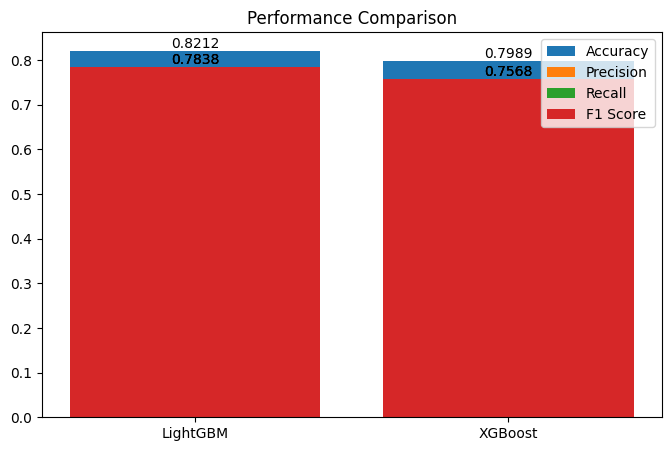

In [18]:
plt.figure(figsize=(8, 5))
for i, metric in enumerate(metrics):
    plt.bar(models, results[:, i], label=metric)
    plt.text(0, results[0, i], f"{results[0, i]:.4f}", ha='center', va='bottom')
    plt.text(1, results[1, i], f"{results[1, i]:.4f}", ha='center', va='bottom')
plt.title("Performance Comparison")
plt.legend()
plt.show()